## Numpy2 : 넘파이 배열 연산
넘파이는 배열 내부 또는 배열 외부와 관련된 다양한 연산을 지원한다. 크게 배열 내부의 연산을 지원하는 **연산 함수**와 배열 간의 연산을 지원하는 **연결 함수**가 있다.

In [77]:
import numpy as np

---

### 1.연산 함수
넘파이는 배열 내부의 연산을 지원하는 다양한 **연산 함수**(operation function)를 제공한다. 이러한 연산을 위해 사전에 알아야 하는 개념은 축(axis)이다. 축은 배열의 구조(shape)를 설명할 때 사용했던 개념으로, 랭크가 증가할 때마다 차원이 증가하는데, 이를 **축**이라고 한다.

In [78]:
#벡터
x=np.arange(1,11)
print(x.sum())

55


In [79]:
#행렬
x=np.arange(1,13).reshape(3,4) #3*4 행렬
print(x)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [80]:
print(x.sum(axis=0))
print(x.sum(axis=1))

[15 18 21 24]
[10 26 42]


In [81]:
##3차원 텐서
x=np.arange(1,13).reshape(3,4)
tensor_3d = np.array([x,x,x])
print(tensor_3d)

[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]]


In [82]:
print(tensor_3d.sum(axis=0))
print('-'*15)
print(tensor_3d.sum(axis=1))
print('-'*15)
print(tensor_3d.sum(axis=2))

[[ 3  6  9 12]
 [15 18 21 24]
 [27 30 33 36]]
---------------
[[15 18 21 24]
 [15 18 21 24]
 [15 18 21 24]]
---------------
[[10 26 42]
 [10 26 42]
 [10 26 42]]


기존 벡터에서 행렬로 차원이 증가할 때 기존 열에 해당하는 축이 0->1이 되고, 새로 추가되는 행의 축이 0이 되는 것을 알 수 있다. 텐서에서도 새롭게 추가되는 축이 0이며, 이전에 0이였던 열은 1, 행은 2로 차원이 증가할수록 뒤로 밀려나는 것을 확인할 수 있다. 그림을 보면 더 잘 이해할 수 있을 것이다.  
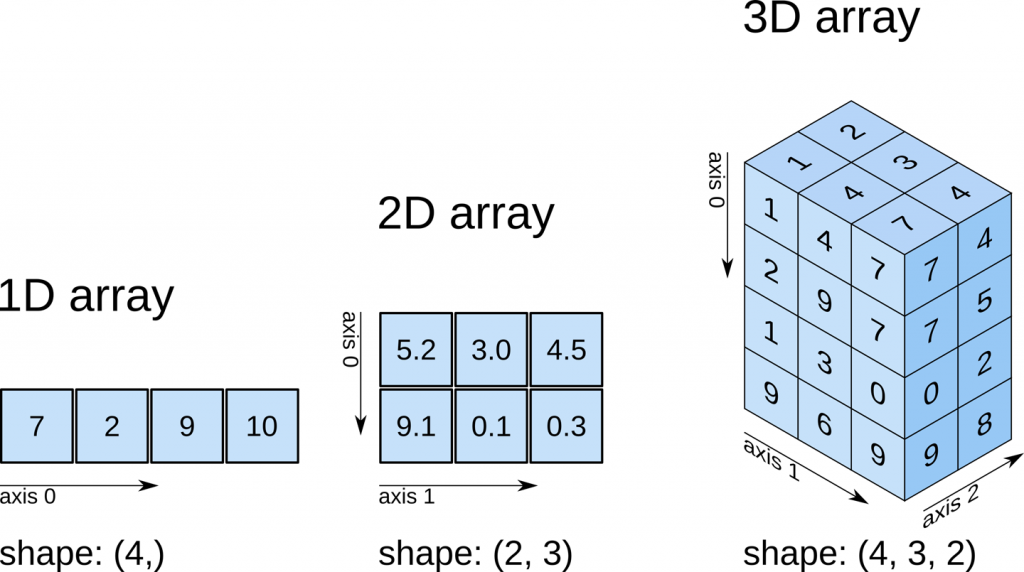

sum 외에도 tan,sin,exp,mean,std 등 다양한 수학,통계 함수를 제공한다.

In [83]:
x=np.arange(1,13).reshape(3,4)
print(x)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [84]:
##평균 연산(열 방향)
print(x.mean(axis=0))

##표준편차
print(x.std())
print(x.std(axis=1))

##각 원소에 제곱근 연산
print(np.sqrt(x))

[5. 6. 7. 8.]
3.452052529534663
[1.11803399 1.11803399 1.11803399]
[[1.         1.41421356 1.73205081 2.        ]
 [2.23606798 2.44948974 2.64575131 2.82842712]
 [3.         3.16227766 3.31662479 3.46410162]]


---

### 2.연결 함수
**연결 함수**(concatenation function)는 두 객체 간의 결합을 지원한다. 넘파이의 연결은 기본적으로 축을 기준으로 발생한다.  
개념적으로 보면 그림과 같이 벡터 간 연결을 통해 하나의 행렬을 생성하거나, 열 벡터 간의 연산을 통해 행렬을 생성할 수도 있다. 이를 위해서는 **vstack** 과 **hstack** 함수를 사용한다.
|함수|설명|
|---| ---|
| vstack | 수직(vertical)으로 배열을 붙임 |
| hstack | 수평(horizontal)으로 배열을 붙임 |  

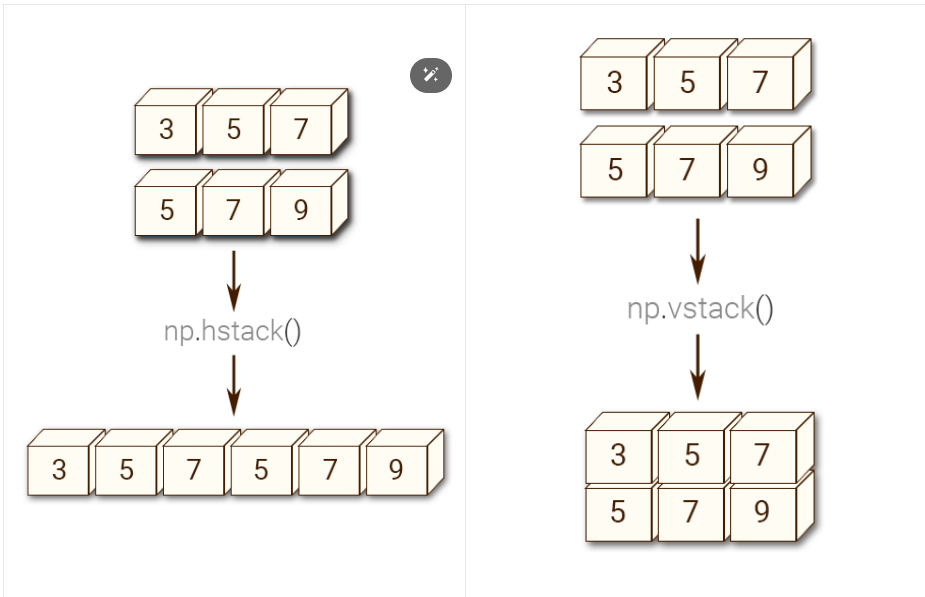

In [85]:
v1=np.array([1,2,3])
v2=np.array([4,5,6])
print(np.vstack((v1,v2)))
print('-'*10)
print(np.hstack((v1,v2)))

[[1 2 3]
 [4 5 6]]
----------
[1 2 3 4 5 6]


아래의 코드를 보면 hstack을 이용하여 열 벡터를 생성하기 위해서는 기본 꼴을 2차원 행렬 형태로 구성한 것을 확인할 수 있다. 이는 기본적으로 넘파이가 열 벡터를 표현할 수 없기 때문에 행렬 형태로 표현한 것이다. 만약 행렬 형태로 표현하지 않고 벡터 형태 그대로 hstack을 붙일 경우 그대로 벡터 형태의 배열이 생성된다.

In [86]:
v1=v1.reshape(-1,1)
v2=v2.reshape(-1,1)
print(v1)
print('-'*4)
print(v2)

[[1]
 [2]
 [3]]
----
[[4]
 [5]
 [6]]


In [87]:
print(np.hstack((v1,v2)))

[[1 4]
 [2 5]
 [3 6]]


또 다른 연결 함수로는 **concatenate** 함수가 있다. 이 함수는 축을 고려하여 두 개의 배열을 결합하는 역할을 한다. 또한 스택 계열의 함수와 가장 큰 차이점은 **생성될 배열과 소스가 되는 배열의 차원이 같아야 한다**는 점이다.  
만약 두 개의 벡터를 붙여 하나의 행렬로 만들고 싶다면 해당 벡터를 일단 2차원 배열 꼴로 변환한 후 행렬로 나타내야 한다.  

In [88]:
##v1 & v2 : 행렬이지만 벡터의 형태를 가짐
v1=np.array([[1,2,3]])
v2=np.array([[4,5,6]])

print(np.concatenate((v1,v2),axis=0))
print(np.concatenate((v1,v2),axis=1))

[[1 2 3]
 [4 5 6]]
[[1 2 3 4 5 6]]


다음 그림과 같은 구조의 배열을 연결하기 위해서는 기본적으로 각 배열을 행렬 형태로 변경한 후에 연결시켜야 한다.  
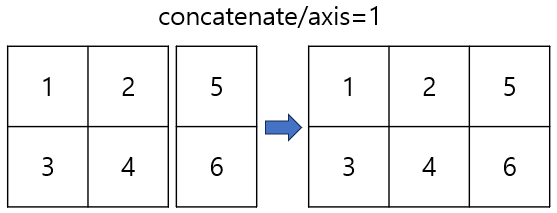

In [89]:
v1=np.array([1,2,3,4]).reshape(2,2)
v2=np.array([[5,6]]).T  ##T: matrix transpose

print(v1)
print('-'*8)
print(v2)

[[1 2]
 [3 4]]
--------
[[5]
 [6]]


In [90]:
print(np.concatenate((v1,v2),axis=1))

[[1 2 5]
 [3 4 6]]


---

### 3.사칙연산 함수  
기본적으로 넘파이는 배열 간 사칙연산을 파이썬과 동일하게 지원한다. 즉 행렬과 행렬 간, 벡터와 벡터 간의 연산이 가능한데 R과 같이 **같은 배열의 shape**를 가진 배열 간의 연산은 기본적으로 요소별 연산, **element-wise operation**이 발생한다.  
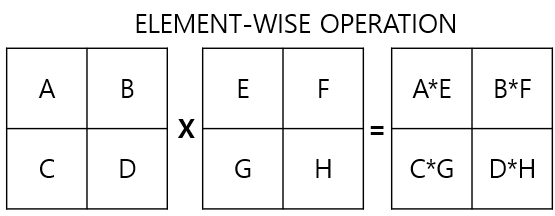

In [91]:
x=np.arange(1,7).reshape(2,3)
print(x)

[[1 2 3]
 [4 5 6]]


In [92]:
##더하기
print(x+x)

##뺴기
print(x-x)

##나누기
print(x/x)

##제곱
print(x**x)

[[ 2  4  6]
 [ 8 10 12]]
[[0 0 0]
 [0 0 0]]
[[1. 1. 1.]
 [1. 1. 1.]]
[[    1     4    27]
 [  256  3125 46656]]


배열 간 내적(dot product)는 **dot**함수를 사용한다.  
x1.dot(x2) = $X1 \times X2$  
x2.dot(x1) = $X2 \times X1$  
<span style='color:red;'>내적은 같은 배열간 연산이라도 순서에 따라 다르다.

In [93]:
x1=np.arange(1,7).reshape(2,3)
x2=np.arange(1,7).reshape(3,2)
print(x1)
print(x2)

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]


In [94]:
print(x1.dot(x2))
print('-'*10)
print(x2.dot(x1))

[[22 28]
 [49 64]]
----------
[[ 9 12 15]
 [19 26 33]
 [29 40 51]]


다음으로 살펴볼 연산은 배열의 구조가 다른 배열 간의 연산인 **브로드캐스팅** 연산 (broadcasting operation)이다. 브로드캐스팅 연산은 하나의 행렬과 스칼라값들 간의 연산이나 행렬과 벡터 간의 연산에서 발생한다.이러한 연산은 아래의 그림처럼 일종의 요소별 연산과 같이 변형이 일어나서 연산이 되는 것을 알 수 있다.  
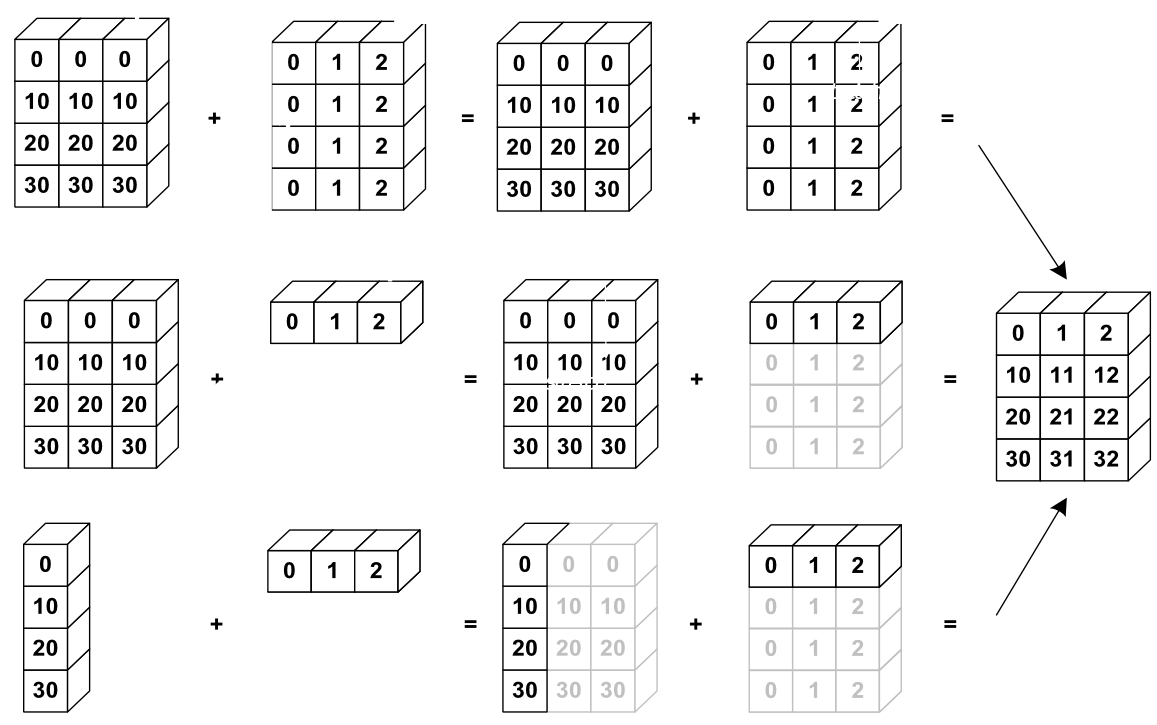

In [95]:
##행렬과 스칼라 값 간 브로드캐스팅 연산
x=np.arange(1,10).reshape(3,3)
print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [96]:
print(x+10)
print('-'*10)
print(x-2)
print('-'*10)
print(x//3)
print('-'*10)
print(x**2)

[[11 12 13]
 [14 15 16]
 [17 18 19]]
----------
[[-1  0  1]
 [ 2  3  4]
 [ 5  6  7]]
----------
[[0 0 1]
 [1 1 2]
 [2 2 3]]
----------
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]


In [97]:
##행렬과 벡터 간 브로드캐스팅 연산
x=np.arange(1,13).reshape(4,3)
v=np.arange(10,40,10)
print(x)
print(v)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[10 20 30]


In [98]:
print(x+v)

[[11 22 33]
 [14 25 36]
 [17 28 39]
 [20 31 42]]


해당 연산을 살펴보면 행렬은 4*3이고, 벡터는 1*3이다. 이때 브로드캐스팅 연산이 일어나면 뒤에 있는 벡터가 앞에 있는 행렬과 크기를 맞추기 위해 다시 [10,20,30]의 벡터를 4*3의 행렬처럼 복제가 일어나 [[10,20,30],[10,20,30],[10,20,30],[10,20,30]] 형태로 변화하게 된다. 그러면서 element-wise 연산처럼 연산이 일어나고, 각 인덱스에 맞춰서 덧셈 연산이 발생한다. 이러한 구조를 빠르게 파악해야 넘파이 연산에 대해 이해할 수 있다.    
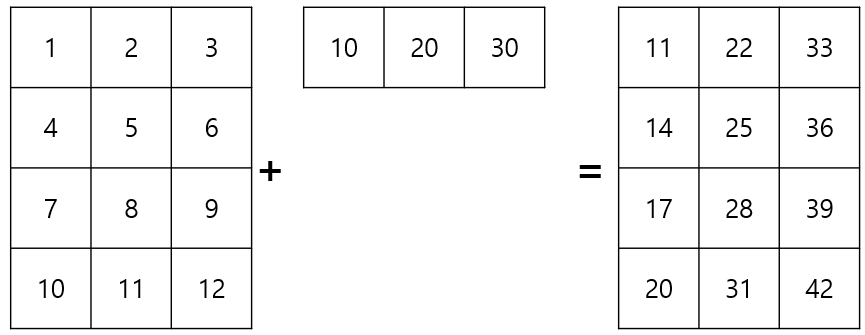